In [4]:
from datetime import datetime
from elasticsearch import Elasticsearch
from pandas import DataFrame, Series
import pandas as pd

In [5]:
es = Elasticsearch(['localhost:9212'])

In [6]:
res = es.search(index='user_live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "gte": "now-3d"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            
print (res)

{'took': 85, 'timed_out': False, '_shards': {'total': 5, 'successful': 5, 'failed': 0}, 'hits': {'total': 126675, 'max_score': 0.0, 'hits': []}, 'aggregations': {'days': {'buckets': [{'key_as_string': 'Wed Aug 02 22:00:00 +0000 2017', 'key': 1501711200000, 'doc_count': 4}, {'key_as_string': 'Wed Aug 02 23:00:00 +0000 2017', 'key': 1501714800000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 00:00:00 +0000 2017', 'key': 1501718400000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 01:00:00 +0000 2017', 'key': 1501722000000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 02:00:00 +0000 2017', 'key': 1501725600000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 03:00:00 +0000 2017', 'key': 1501729200000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 04:00:00 +0000 2017', 'key': 1501732800000, 'doc_count': 3577}, {'key_as_string': 'Thu Aug 03 05:00:00 +0000 2017', 'key': 1501736400000, 'doc_count': 13818}, {'key_as_string': 'Thu Aug 03 06:00:00 +0000 2017', 'key': 1501740000000, 'doc_cou

In [7]:
buckets = (res['aggregations']['days']['buckets'])
print(buckets)


[{'key_as_string': 'Wed Aug 02 22:00:00 +0000 2017', 'key': 1501711200000, 'doc_count': 4}, {'key_as_string': 'Wed Aug 02 23:00:00 +0000 2017', 'key': 1501714800000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 00:00:00 +0000 2017', 'key': 1501718400000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 01:00:00 +0000 2017', 'key': 1501722000000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 02:00:00 +0000 2017', 'key': 1501725600000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 03:00:00 +0000 2017', 'key': 1501729200000, 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 04:00:00 +0000 2017', 'key': 1501732800000, 'doc_count': 3577}, {'key_as_string': 'Thu Aug 03 05:00:00 +0000 2017', 'key': 1501736400000, 'doc_count': 13818}, {'key_as_string': 'Thu Aug 03 06:00:00 +0000 2017', 'key': 1501740000000, 'doc_count': 15223}, {'key_as_string': 'Thu Aug 03 07:00:00 +0000 2017', 'key': 1501743600000, 'doc_count': 4003}, {'key_as_string': 'Thu Aug 03 08:00:00 +0000 2017', 'key': 1501747200000, '

In [8]:
for element in buckets: 
        del element['key'] 

print (buckets)

[{'key_as_string': 'Wed Aug 02 22:00:00 +0000 2017', 'doc_count': 4}, {'key_as_string': 'Wed Aug 02 23:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 00:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 01:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 02:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 03:00:00 +0000 2017', 'doc_count': 0}, {'key_as_string': 'Thu Aug 03 04:00:00 +0000 2017', 'doc_count': 3577}, {'key_as_string': 'Thu Aug 03 05:00:00 +0000 2017', 'doc_count': 13818}, {'key_as_string': 'Thu Aug 03 06:00:00 +0000 2017', 'doc_count': 15223}, {'key_as_string': 'Thu Aug 03 07:00:00 +0000 2017', 'doc_count': 4003}, {'key_as_string': 'Thu Aug 03 08:00:00 +0000 2017', 'doc_count': 7112}, {'key_as_string': 'Thu Aug 03 09:00:00 +0000 2017', 'doc_count': 7474}, {'key_as_string': 'Thu Aug 03 10:00:00 +0000 2017', 'doc_count': 1996}, {'key_as_string': 'Thu Aug 03 11:00:00 +0000 2017', 'doc_count': 0}, {'key_as_s

In [9]:
df = pd.DataFrame(buckets,columns=['key_as_string', 'doc_count'])
df.columns = ['date', 'doc_count']

print(df)
print(df.index.name)

                              date  doc_count
0   Wed Aug 02 22:00:00 +0000 2017          4
1   Wed Aug 02 23:00:00 +0000 2017          0
2   Thu Aug 03 00:00:00 +0000 2017          0
3   Thu Aug 03 01:00:00 +0000 2017          0
4   Thu Aug 03 02:00:00 +0000 2017          0
5   Thu Aug 03 03:00:00 +0000 2017          0
6   Thu Aug 03 04:00:00 +0000 2017       3577
7   Thu Aug 03 05:00:00 +0000 2017      13818
8   Thu Aug 03 06:00:00 +0000 2017      15223
9   Thu Aug 03 07:00:00 +0000 2017       4003
10  Thu Aug 03 08:00:00 +0000 2017       7112
11  Thu Aug 03 09:00:00 +0000 2017       7474
12  Thu Aug 03 10:00:00 +0000 2017       1996
13  Thu Aug 03 11:00:00 +0000 2017          0
14  Thu Aug 03 12:00:00 +0000 2017          0
15  Thu Aug 03 13:00:00 +0000 2017          0
16  Thu Aug 03 14:00:00 +0000 2017          0
17  Thu Aug 03 15:00:00 +0000 2017          0
18  Thu Aug 03 16:00:00 +0000 2017          0
19  Thu Aug 03 17:00:00 +0000 2017          0
20  Thu Aug 03 18:00:00 +0000 2017

In [10]:
res2 = es.search(index='live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "gte": "now-3d"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            
print (res2)

{'took': 47, 'timed_out': False, '_shards': {'total': 5, 'successful': 5, 'failed': 0}, 'hits': {'total': 2622, 'max_score': 0.0, 'hits': []}, 'aggregations': {'days': {'buckets': [{'key_as_string': 'Fri Aug 04 11:00:00 +0000 2017', 'key': 1501844400000, 'doc_count': 45}, {'key_as_string': 'Fri Aug 04 12:00:00 +0000 2017', 'key': 1501848000000, 'doc_count': 95}, {'key_as_string': 'Fri Aug 04 13:00:00 +0000 2017', 'key': 1501851600000, 'doc_count': 77}, {'key_as_string': 'Fri Aug 04 14:00:00 +0000 2017', 'key': 1501855200000, 'doc_count': 123}, {'key_as_string': 'Fri Aug 04 15:00:00 +0000 2017', 'key': 1501858800000, 'doc_count': 88}, {'key_as_string': 'Fri Aug 04 16:00:00 +0000 2017', 'key': 1501862400000, 'doc_count': 68}, {'key_as_string': 'Fri Aug 04 17:00:00 +0000 2017', 'key': 1501866000000, 'doc_count': 66}, {'key_as_string': 'Fri Aug 04 18:00:00 +0000 2017', 'key': 1501869600000, 'doc_count': 73}, {'key_as_string': 'Fri Aug 04 19:00:00 +0000 2017', 'key': 1501873200000, 'doc_cou

In [11]:
buckets2 = (res2['aggregations']['days']['buckets'])
print(buckets2)

[{'key_as_string': 'Fri Aug 04 11:00:00 +0000 2017', 'key': 1501844400000, 'doc_count': 45}, {'key_as_string': 'Fri Aug 04 12:00:00 +0000 2017', 'key': 1501848000000, 'doc_count': 95}, {'key_as_string': 'Fri Aug 04 13:00:00 +0000 2017', 'key': 1501851600000, 'doc_count': 77}, {'key_as_string': 'Fri Aug 04 14:00:00 +0000 2017', 'key': 1501855200000, 'doc_count': 123}, {'key_as_string': 'Fri Aug 04 15:00:00 +0000 2017', 'key': 1501858800000, 'doc_count': 88}, {'key_as_string': 'Fri Aug 04 16:00:00 +0000 2017', 'key': 1501862400000, 'doc_count': 68}, {'key_as_string': 'Fri Aug 04 17:00:00 +0000 2017', 'key': 1501866000000, 'doc_count': 66}, {'key_as_string': 'Fri Aug 04 18:00:00 +0000 2017', 'key': 1501869600000, 'doc_count': 73}, {'key_as_string': 'Fri Aug 04 19:00:00 +0000 2017', 'key': 1501873200000, 'doc_count': 76}, {'key_as_string': 'Fri Aug 04 20:00:00 +0000 2017', 'key': 1501876800000, 'doc_count': 63}, {'key_as_string': 'Fri Aug 04 21:00:00 +0000 2017', 'key': 1501880400000, 'doc

In [12]:
for element in buckets2: 
        del element['key'] 

print (buckets2)

[{'key_as_string': 'Fri Aug 04 11:00:00 +0000 2017', 'doc_count': 45}, {'key_as_string': 'Fri Aug 04 12:00:00 +0000 2017', 'doc_count': 95}, {'key_as_string': 'Fri Aug 04 13:00:00 +0000 2017', 'doc_count': 77}, {'key_as_string': 'Fri Aug 04 14:00:00 +0000 2017', 'doc_count': 123}, {'key_as_string': 'Fri Aug 04 15:00:00 +0000 2017', 'doc_count': 88}, {'key_as_string': 'Fri Aug 04 16:00:00 +0000 2017', 'doc_count': 68}, {'key_as_string': 'Fri Aug 04 17:00:00 +0000 2017', 'doc_count': 66}, {'key_as_string': 'Fri Aug 04 18:00:00 +0000 2017', 'doc_count': 73}, {'key_as_string': 'Fri Aug 04 19:00:00 +0000 2017', 'doc_count': 76}, {'key_as_string': 'Fri Aug 04 20:00:00 +0000 2017', 'doc_count': 63}, {'key_as_string': 'Fri Aug 04 21:00:00 +0000 2017', 'doc_count': 93}, {'key_as_string': 'Fri Aug 04 22:00:00 +0000 2017', 'doc_count': 74}, {'key_as_string': 'Fri Aug 04 23:00:00 +0000 2017', 'doc_count': 98}, {'key_as_string': 'Sat Aug 05 00:00:00 +0000 2017', 'doc_count': 61}, {'key_as_string': 

In [13]:
df2 = pd.DataFrame(buckets2,columns=['key_as_string', 'doc_count'])
df2.columns = ['date', 'doc_count']
print(df2)

                              date  doc_count
0   Fri Aug 04 11:00:00 +0000 2017         45
1   Fri Aug 04 12:00:00 +0000 2017         95
2   Fri Aug 04 13:00:00 +0000 2017         77
3   Fri Aug 04 14:00:00 +0000 2017        123
4   Fri Aug 04 15:00:00 +0000 2017         88
5   Fri Aug 04 16:00:00 +0000 2017         68
6   Fri Aug 04 17:00:00 +0000 2017         66
7   Fri Aug 04 18:00:00 +0000 2017         73
8   Fri Aug 04 19:00:00 +0000 2017         76
9   Fri Aug 04 20:00:00 +0000 2017         63
10  Fri Aug 04 21:00:00 +0000 2017         93
11  Fri Aug 04 22:00:00 +0000 2017         74
12  Fri Aug 04 23:00:00 +0000 2017         98
13  Sat Aug 05 00:00:00 +0000 2017         61
14  Sat Aug 05 01:00:00 +0000 2017         52
15  Sat Aug 05 02:00:00 +0000 2017         36
16  Sat Aug 05 03:00:00 +0000 2017         32
17  Sat Aug 05 04:00:00 +0000 2017         29
18  Sat Aug 05 05:00:00 +0000 2017         29
19  Sat Aug 05 06:00:00 +0000 2017         39
20  Sat Aug 05 07:00:00 +0000 2017

In [14]:
df3 = df.merge(df2, on='date')

In [15]:
df3.columns = ['date', 'doc_count_bot', 'doc_count_human']

In [16]:
df3

,date,doc_count_bot,doc_count_human
0,Fri Aug 04 11:00:00 +0000 2017,0,45
1,Fri Aug 04 12:00:00 +0000 2017,0,95
2,Fri Aug 04 13:00:00 +0000 2017,0,77
3,Fri Aug 04 14:00:00 +0000 2017,0,123
4,Fri Aug 04 15:00:00 +0000 2017,0,88
5,Fri Aug 04 16:00:00 +0000 2017,0,68
6,Fri Aug 04 17:00:00 +0000 2017,0,66
7,Fri Aug 04 18:00:00 +0000 2017,0,73
8,Fri Aug 04 19:00:00 +0000 2017,0,76
9,Fri Aug 04 20:00:00 +0000 2017,0,63


In [17]:
df3['total_tweets'] = df3['doc_count_bot'] + df3['doc_count_human']

In [18]:
df3

,date,doc_count_bot,doc_count_human,total_tweets
0,Fri Aug 04 11:00:00 +0000 2017,0,45,45
1,Fri Aug 04 12:00:00 +0000 2017,0,95,95
2,Fri Aug 04 13:00:00 +0000 2017,0,77,77
3,Fri Aug 04 14:00:00 +0000 2017,0,123,123
4,Fri Aug 04 15:00:00 +0000 2017,0,88,88
5,Fri Aug 04 16:00:00 +0000 2017,0,68,68
6,Fri Aug 04 17:00:00 +0000 2017,0,66,66
7,Fri Aug 04 18:00:00 +0000 2017,0,73,73
8,Fri Aug 04 19:00:00 +0000 2017,0,76,76
9,Fri Aug 04 20:00:00 +0000 2017,0,63,63


In [19]:
df3['percent_bot'] = (df3['doc_count_bot']/df3['total_tweets']) * 100
pd.options.display.float_format = '{:,.2f}'.format
df3['percent_human'] = (df3['doc_count_human']/df3['total_tweets']) * 100

df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human
0,Fri Aug 04 11:00:00 +0000 2017,0,45,45,0.00,100.00
1,Fri Aug 04 12:00:00 +0000 2017,0,95,95,0.00,100.00
2,Fri Aug 04 13:00:00 +0000 2017,0,77,77,0.00,100.00
3,Fri Aug 04 14:00:00 +0000 2017,0,123,123,0.00,100.00
4,Fri Aug 04 15:00:00 +0000 2017,0,88,88,0.00,100.00
5,Fri Aug 04 16:00:00 +0000 2017,0,68,68,0.00,100.00
6,Fri Aug 04 17:00:00 +0000 2017,0,66,66,0.00,100.00
7,Fri Aug 04 18:00:00 +0000 2017,0,73,73,0.00,100.00
8,Fri Aug 04 19:00:00 +0000 2017,0,76,76,0.00,100.00
9,Fri Aug 04 20:00:00 +0000 2017,0,63,63,0.00,100.00


In [20]:
df3['date'] = pd.to_datetime(df3['date'])

In [21]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

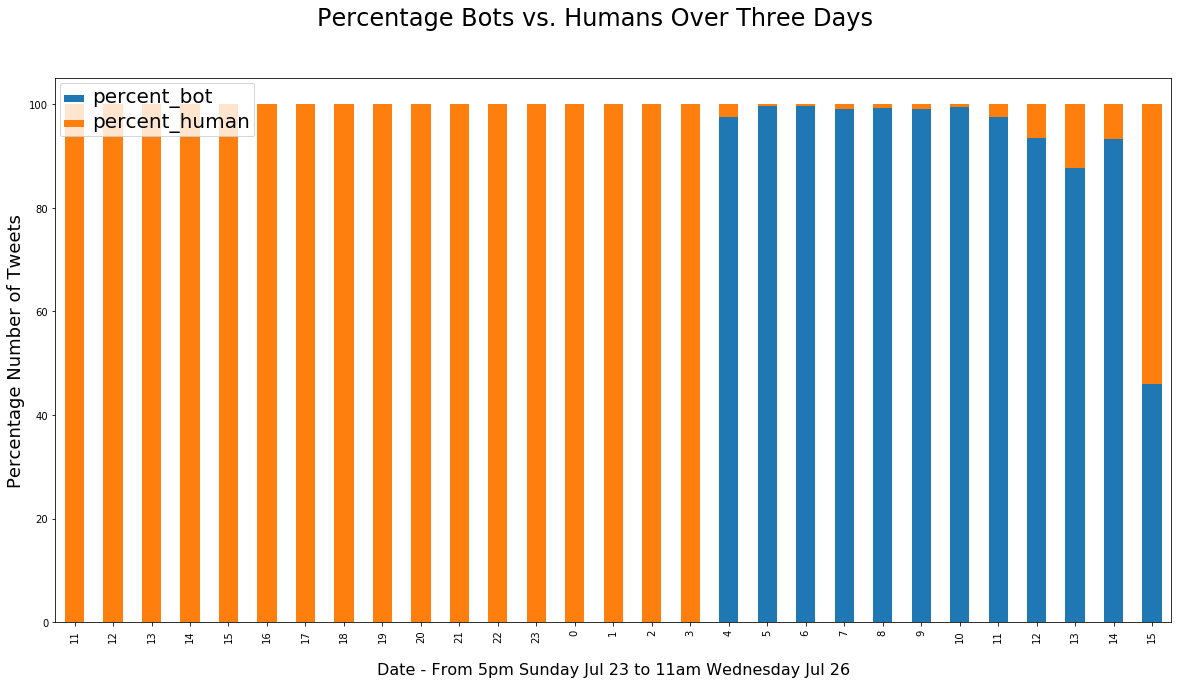

In [22]:
plt.figure();
df3.plot(x=df3['date'].dt.hour, y=["percent_bot", "percent_human"],stacked=True, kind="bar",figsize=(20,10))
plt.xlabel('Date - From 5pm Sunday Jul 23 to 11am Wednesday Jul 26', fontsize = 16, labelpad=20)
plt.ylabel('Percentage Number of Tweets', fontsize='18')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') #legend 'list' fontsize
plt.suptitle('Percentage Bots vs. Humans Over Three Days', fontsize='24')
plt.show()


In [23]:
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human
0,2017-08-04 11:00:00,0,45,45,0.00,100.00
1,2017-08-04 12:00:00,0,95,95,0.00,100.00
2,2017-08-04 13:00:00,0,77,77,0.00,100.00
3,2017-08-04 14:00:00,0,123,123,0.00,100.00
4,2017-08-04 15:00:00,0,88,88,0.00,100.00
5,2017-08-04 16:00:00,0,68,68,0.00,100.00
6,2017-08-04 17:00:00,0,66,66,0.00,100.00
7,2017-08-04 18:00:00,0,73,73,0.00,100.00
8,2017-08-04 19:00:00,0,76,76,0.00,100.00
9,2017-08-04 20:00:00,0,63,63,0.00,100.00


In [24]:
df3['normalize_bot'] = (df3['doc_count_bot'] - min(df3['doc_count_bot']))/(max(df3['doc_count_bot'])-min(df3['doc_count_bot']))

In [25]:
df3


,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot
0,2017-08-04 11:00:00,0,45,45,0.00,100.00,0.00
1,2017-08-04 12:00:00,0,95,95,0.00,100.00,0.00
2,2017-08-04 13:00:00,0,77,77,0.00,100.00,0.00
3,2017-08-04 14:00:00,0,123,123,0.00,100.00,0.00
4,2017-08-04 15:00:00,0,88,88,0.00,100.00,0.00
5,2017-08-04 16:00:00,0,68,68,0.00,100.00,0.00
6,2017-08-04 17:00:00,0,66,66,0.00,100.00,0.00
7,2017-08-04 18:00:00,0,73,73,0.00,100.00,0.00
8,2017-08-04 19:00:00,0,76,76,0.00,100.00,0.00
9,2017-08-04 20:00:00,0,63,63,0.00,100.00,0.00


In [26]:
df3['normalize_human'] = (df3['doc_count_human'] - min(df3['doc_count_human']))/(max(df3['doc_count_human'])-min(df3['doc_count_human']))
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human
0,2017-08-04 11:00:00,0,45,45,0.00,100.00,0.00,0.09
1,2017-08-04 12:00:00,0,95,95,0.00,100.00,0.00,0.38
2,2017-08-04 13:00:00,0,77,77,0.00,100.00,0.00,0.28
3,2017-08-04 14:00:00,0,123,123,0.00,100.00,0.00,0.55
4,2017-08-04 15:00:00,0,88,88,0.00,100.00,0.00,0.34
5,2017-08-04 16:00:00,0,68,68,0.00,100.00,0.00,0.23
6,2017-08-04 17:00:00,0,66,66,0.00,100.00,0.00,0.22
7,2017-08-04 18:00:00,0,73,73,0.00,100.00,0.00,0.26
8,2017-08-04 19:00:00,0,76,76,0.00,100.00,0.00,0.27
9,2017-08-04 20:00:00,0,63,63,0.00,100.00,0.00,0.20


In [32]:
df3['moving_avg_bot'] = df3['normalize_bot'].rolling(window=2).mean()
df3

,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human,moving_avg_bot,moving_avg_human
0,2017-08-04 11:00:00,0,45,45,0.00,100.00,0.00,0.09,nan,nan
1,2017-08-04 12:00:00,0,95,95,0.00,100.00,0.00,0.38,0.00,70.00
2,2017-08-04 13:00:00,0,77,77,0.00,100.00,0.00,0.28,0.00,86.00
3,2017-08-04 14:00:00,0,123,123,0.00,100.00,0.00,0.55,0.00,100.00
4,2017-08-04 15:00:00,0,88,88,0.00,100.00,0.00,0.34,0.00,105.50
5,2017-08-04 16:00:00,0,68,68,0.00,100.00,0.00,0.23,0.00,78.00
6,2017-08-04 17:00:00,0,66,66,0.00,100.00,0.00,0.22,0.00,67.00
7,2017-08-04 18:00:00,0,73,73,0.00,100.00,0.00,0.26,0.00,69.50
8,2017-08-04 19:00:00,0,76,76,0.00,100.00,0.00,0.27,0.00,74.50
9,2017-08-04 20:00:00,0,63,63,0.00,100.00,0.00,0.20,0.00,69.50


In [33]:
df3['moving_avg_human'] = df3['normalize_human'].rolling(window=2).mean()
df3


,date,doc_count_bot,doc_count_human,total_tweets,percent_bot,percent_human,normalize_bot,normalize_human,moving_avg_bot,moving_avg_human
0,2017-08-04 11:00:00,0,45,45,0.00,100.00,0.00,0.09,nan,nan
1,2017-08-04 12:00:00,0,95,95,0.00,100.00,0.00,0.38,0.00,0.24
2,2017-08-04 13:00:00,0,77,77,0.00,100.00,0.00,0.28,0.00,0.33
3,2017-08-04 14:00:00,0,123,123,0.00,100.00,0.00,0.55,0.00,0.41
4,2017-08-04 15:00:00,0,88,88,0.00,100.00,0.00,0.34,0.00,0.44
5,2017-08-04 16:00:00,0,68,68,0.00,100.00,0.00,0.23,0.00,0.28
6,2017-08-04 17:00:00,0,66,66,0.00,100.00,0.00,0.22,0.00,0.22
7,2017-08-04 18:00:00,0,73,73,0.00,100.00,0.00,0.26,0.00,0.24
8,2017-08-04 19:00:00,0,76,76,0.00,100.00,0.00,0.27,0.00,0.26
9,2017-08-04 20:00:00,0,63,63,0.00,100.00,0.00,0.20,0.00,0.24


In [34]:
df4 = df3[['date','moving_avg_bot','moving_avg_human']].copy()

In [35]:
df4


,date,moving_avg_bot,moving_avg_human
0,2017-08-04 11:00:00,nan,nan
1,2017-08-04 12:00:00,0.00,0.24
2,2017-08-04 13:00:00,0.00,0.33
3,2017-08-04 14:00:00,0.00,0.41
4,2017-08-04 15:00:00,0.00,0.44
5,2017-08-04 16:00:00,0.00,0.28
6,2017-08-04 17:00:00,0.00,0.22
7,2017-08-04 18:00:00,0.00,0.24
8,2017-08-04 19:00:00,0.00,0.26
9,2017-08-04 20:00:00,0.00,0.24


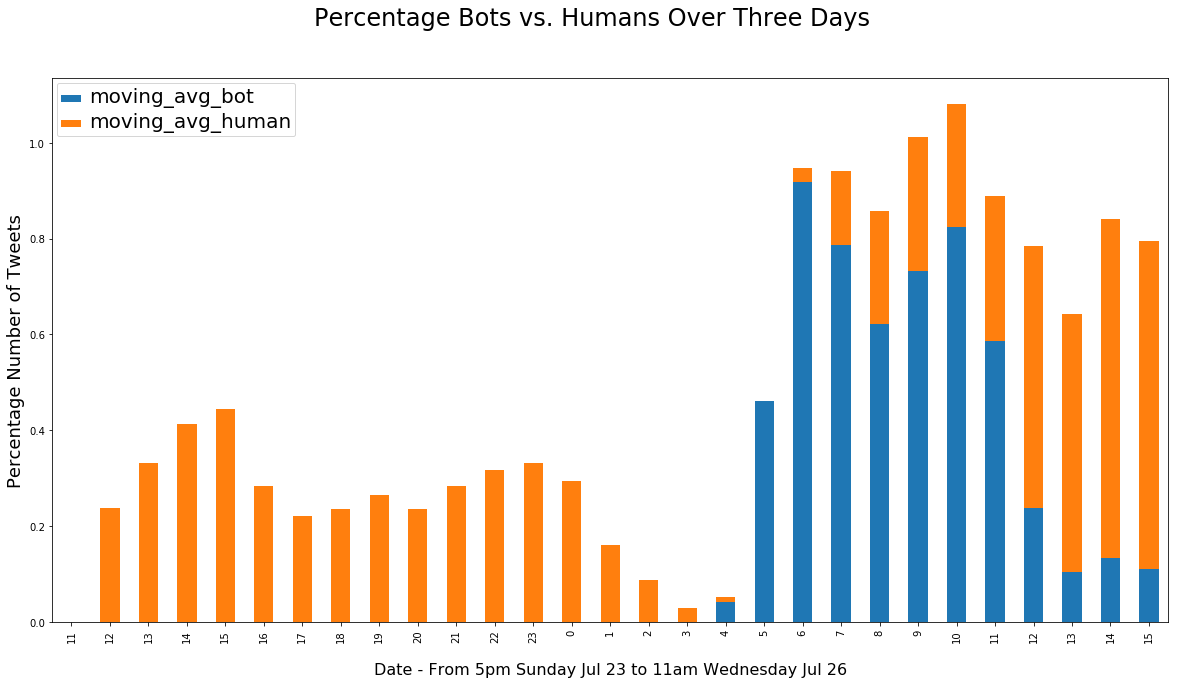

In [42]:
plt.figure();
df4.plot(x=df4['date'].dt.hour, y=["moving_avg_bot", "moving_avg_human"],stacked=True, kind="bar",figsize=(20,10))
plt.xlabel('Date - From 5pm Sunday Jul 23 to 11am Wednesday Jul 26', fontsize = 16, labelpad=20)
plt.ylabel('Percentage Number of Tweets', fontsize='18')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='20') #legend 'list' fontsize
plt.suptitle('Percentage Bots vs. Humans Over Three Days', fontsize='24')
plt.show()